In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv('BRBY.csv')

In [3]:
ticket='BRBY'
df['Close']=df['Close'].astype(float)

In [4]:
df.describe()

,Close
count,2705.00000
mean,1692.63597
std,353.12075
min,571.00000
25%,1457.00000
50%,1716.00000
75%,1915.00000
max,2641.00000


In [5]:
df['Close'].dropna

<bound method Series.dropna of 0       1502.0
1       1513.0
2       1505.0
3       1480.0
4       1450.0
         ...  
2723     571.0
2724     580.0
2725     584.4
2726     592.4
2727     586.8
Name: Close, Length: 2728, dtype: float64>

In [6]:
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()

In [20]:
df.index = df['Exchange Date']


In [11]:
df.head()

,Exchange Date,Close,MA10,MA50
Exchange Date,,,,
02/01/2014,02/01/2014,1502.0,NaN,NaN
03/01/2014,03/01/2014,1513.0,NaN,NaN
06/01/2014,06/01/2014,1505.0,NaN,NaN
07/01/2014,07/01/2014,1480.0,NaN,NaN
08/01/2014,08/01/2014,1450.0,NaN,NaN


In [12]:
import plotly.express as px
px.line(df[['Close', 'MA10','MA50']])

In [13]:
# Long or not?

df['Shares'] = [ 1 if df.loc[ei,'MA10']>df.loc[ei,'MA50'] else 0 for ei in df.index]

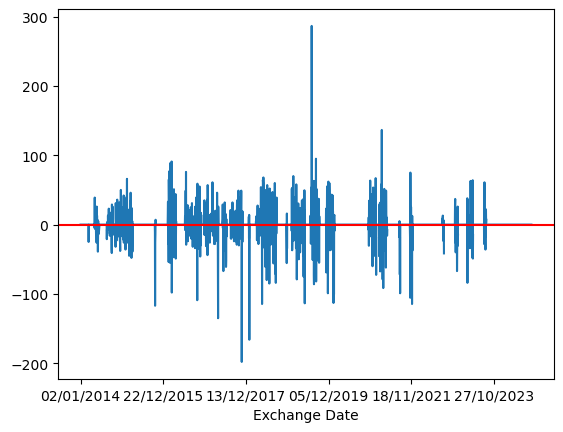

In [14]:
# Daily profit
df['Close1']=df['Close'].shift(-1)
# df.iloc[500:505,:]

df['Profit'] = [df.loc[ei,'Close1']-df.loc[ei,'Close'] if df.loc[ei,'Shares']==1 else 0 for ei in df.index]
df['Profit'].plot()
plt.axhline(y=0,color='red')

In [15]:
# Cumulative wealth
df['wealth']=df['Profit'].cumsum()
df.head()

,Exchange Date,Close,MA10,MA50,Shares,Close1,Profit,wealth
Exchange Date,,,,,,,,
02/01/2014,02/01/2014,1502.0,NaN,NaN,0,1513.0,0.0,0.0
03/01/2014,03/01/2014,1513.0,NaN,NaN,0,1505.0,0.0,0.0
06/01/2014,06/01/2014,1505.0,NaN,NaN,0,1480.0,0.0,0.0
07/01/2014,07/01/2014,1480.0,NaN,NaN,0,1450.0,0.0,0.0
08/01/2014,08/01/2014,1450.0,NaN,NaN,0,1421.0,0.0,0.0


***The moving average does not show any buying opportunities despite a very low historical price level of the stock. The market signal may support the opinion that the stock may go lower. We shall compare with Estee Lauder(?).***

Total money you win is  -85.0
Total money you spent is  1502.0


<Axes: xlabel='Exchange Date'>

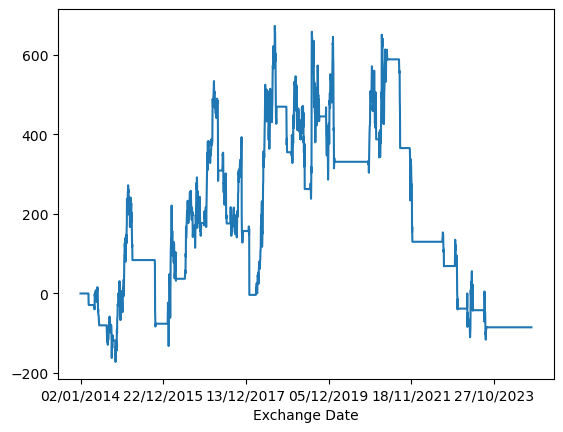

In [16]:
print('Total money you win is ', df.loc[df.index[-2],'wealth'])
print('Total money you spent is ', df.loc[df.index[0],'Close'])
df['wealth'].plot()

In [18]:
df.to_csv('BRBY_signal.csv')